In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

f = pd.read_csv('data-2072-2024-01-15.csv', sep=';')
f.head()
x = f.loc[:, "Количество обучающихся, набравших не менее 220 баллов на трёх экзаменах"]
y = f.loc[:, "Количество обучающихся, набравших больше 160 баллов на трёх экзаменах"]


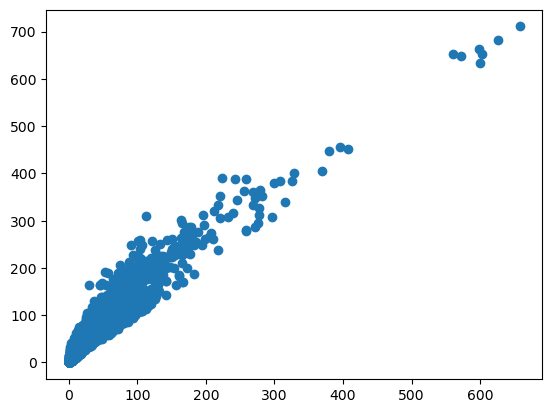

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
a=(len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2)-np.sum(x)**2)
b=(np.sum(y)-a*np.sum(a))/len(x)

In [7]:
a1,  b1 =np.polyfit(x, y, 1)
print(a1, b1)

1.3079373299416537 19.733895857894957


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# создаем модель линейной регрессии
linear_regression_model = LinearRegression()
# метод train_test_split используем для разделения данных на две части: одну для обучения, другую для тестирования
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1), test_size=0.2, random_state=40)
# обучение модели
linear_regression_model.fit(x_train, y_train)
# Прогноз
predicted_data = linear_regression_model.predict(x_test)
# определеим  коэффициенты a(sk_slope),b(sk_intercept)
sk_slope = linear_regression_model.coef_[0]
sk_intercept = linear_regression_model.intercept_
print(sk_slope, sk_intercept)

[1.30778962] [19.71041474]


In [9]:
from sklearn.metrics import r2_score
sk_data= sk_slope*np.array(x) + sk_intercept
mnk_data = a*np.array(x)+b
np_data=a1*np.array(x)+b1

r_mnk = r2_score(y, mnk_data)
r_np = r2_score(y, np_data)
r_sk = r2_score(y, sk_data)
print(r_mnk,r_np,r_sk)

0.37037943208968327 0.8904739014974862 0.8904736642857172
